# Lecture 1.5: Drawing pseudo-random numbers from a probability distribution

In this python demonstration we will be drawing random numbers from a probability distribution. This will also serve as an introduction to python programming. 

## Step 1: Drawing Random Numbers

The first thing we need to do is to know how random numbers are drawin in python.  To do this we first need to **import** the **random library**.  When we import this package we give it a short hand name *rand* so that we can easily accesss the functions it contains.

In [3]:
import random as rand

Using this library we can draw a random (uniformally distributed) number between 0 and 1

In [4]:
rand.random()

0.12377487668043852

Random numbers in the computer are actually **pseduo-random** in that they are based on a **seed** value and an algorithm for creating them.  When not explcitly specified, python grabs this seed value from the **clock** on your computer-which is a pretty good random starting point.  However, in many cases it is actually convient to tell the computer what the random seed is explictly.  This can insure that, while random internally, that you can exactly regenerate your code.  Let's use the random seed 42. 

In [18]:
rand.seed(42)
[rand.random(),rand.random(),rand.random()]

[0.6394267984578837, 0.025010755222666936, 0.27502931836911926]

Now, no matter how many times you re-run the code above you will get the same three random numbers.

To generate these random numbers, the computer uses an algorithm. If one generates enough random numbers, eventually they will start to repeat.  Fortunately the **period** of the python random number generator is $2^{19937}$, so we are in no risk of hitting this period.

Lets create an **array** of 500 random numbers

In [58]:
import numpy as np
arrRand = np.random.rand(500)
print(arrRand[1:10]) #printing the first 10 values

[0.15761672 0.19270451 0.5549761  0.15223543 0.05605569 0.11808088
 0.91506229 0.00122921 0.4777146 ]


To be able to visualize this array we will need a plot.  

<span style="color:red">**Question:**</span>  What should we expect the probability density function for these numbers to look like?

This will require importing another package called matplotlib.  Using matplotlib we can then visualize the data as a histogram.

In [53]:
import matplotlib.pyplot as plt

(array([48., 48., 63., 46., 49., 65., 60., 24., 46., 51.]),
 array([0.00324437, 0.10291031, 0.20257625, 0.30224219, 0.40190813,
        0.50157407, 0.60124002, 0.70090596, 0.8005719 , 0.90023784,
        0.99990378]),
 <BarContainer object of 10 artists>)

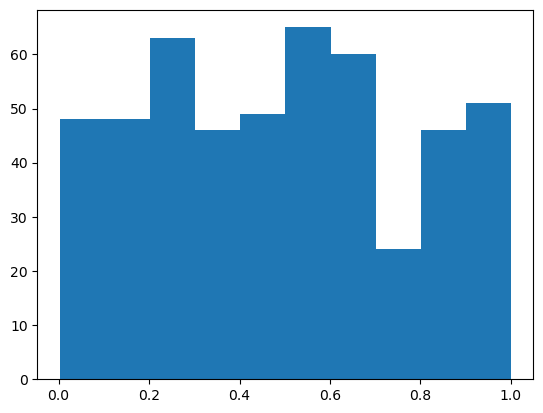

In [54]:
plt.hist(arrRand)

The y-axis of this histogram is in the form of counts.  We can normalize the histogram to represent a probability density function by setting **denisty=True**. The other arguments here set the style of the histogram: **alpha** defines the opacity of the bars, **color** sets the bar colour and **edgecolor** lets us visualize the boundaries fo the bins. 

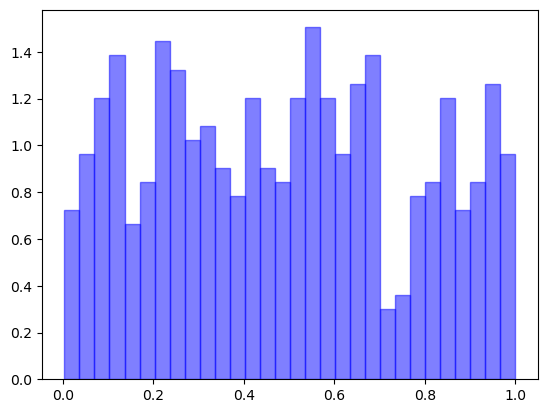

In [55]:
plt.hist(arrRand, bins=30, density=True, alpha=0.5, color='blue', edgecolor='blue');

<span style="color:red">**Question:**</span>  How does the observed PDF compare to your expectation? Is this surprising?

We can also add a title etc. to the plot.  

<span style="color:red">**Note:**</span> ChatGPT is a great resource for programming if you need to learn how to add options.

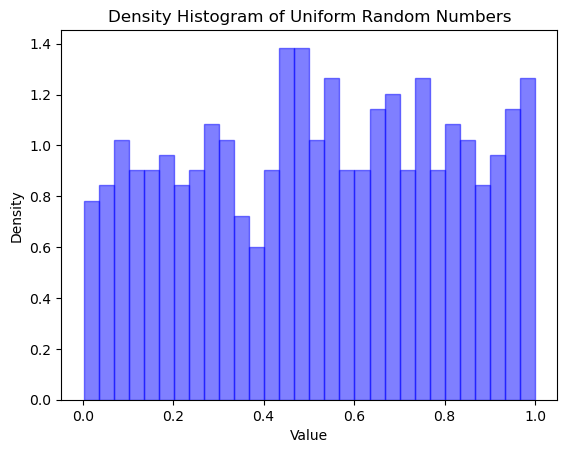

In [42]:
plt.hist(arrRand, bins=30, density=True, alpha=0.5, color='blue', edgecolor='blue');
plt.title('Density Histogram of Uniform Random Numbers')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

## Step 2a: Calculate PDF/CDF of the focal distribution

Let's start with a **standard normal distribution**

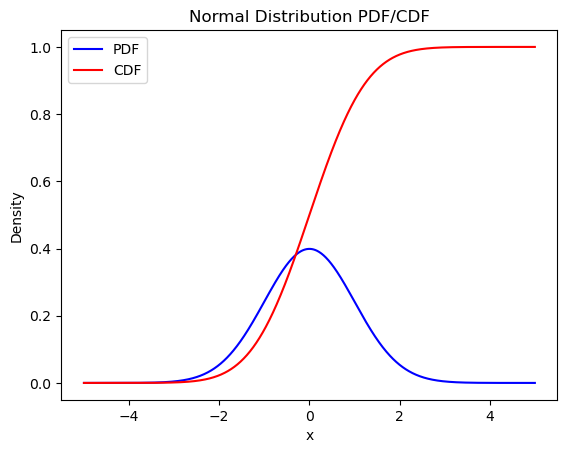

In [47]:
from scipy.stats import norm

# Define parameters of the normal distribution
mu = 0  # mean
sigma = 1  # standard deviation

# Generate a range of values
d = np.linspace(-5, 5, 1000)

# Evaluate the PDF and CDF for each value in the range
pdf_values = norm.pdf(d, mu, sigma)
cdf_values = norm.cdf(d, mu, sigma)

# Plot the PDF
plt.plot(d, pdf_values, label='PDF', color='blue')
plt.plot(d, cdf_values, label='CDF', color='red')
plt.title('Normal Distribution PDF/CDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

## Step 2b: Calculate the CDF of the uniform random numbers

This is easy because for a standard uniform the value $x^*$ of a random number is equal to its CDF.

## Step 3: Solve for $d^*$ such that $CDF(x^*)=CDF(d^*)$

Conviently in python there is a function for this called the PPF (percent point function).

$PPF(y)=d$ implies $CDF_\mathscr{D}(d)=y$

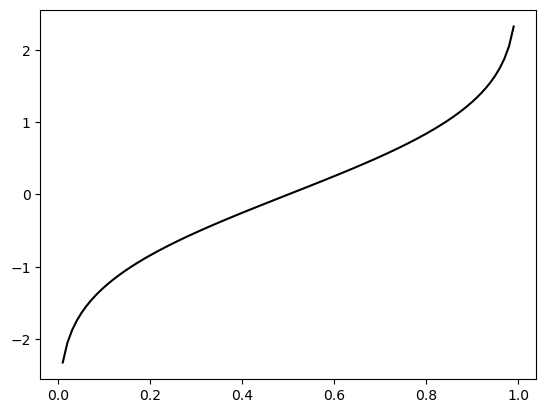

In [49]:
y = np.linspace(0, 1, 100) #Domain between 0 and 1 by defintion of CDF.
inverse_cdf_values = norm.ppf(y, loc=mu, scale=sigma)
plt.plot(y, inverse_cdf_values, label='CDF^-1', color='black');

We can hence calculate the ppf for each uniform random number giving the corresponding list of normally distriubted random numbers.

In [61]:
arrRandNorm=norm.ppf(arrRand, loc=mu, scale=sigma);

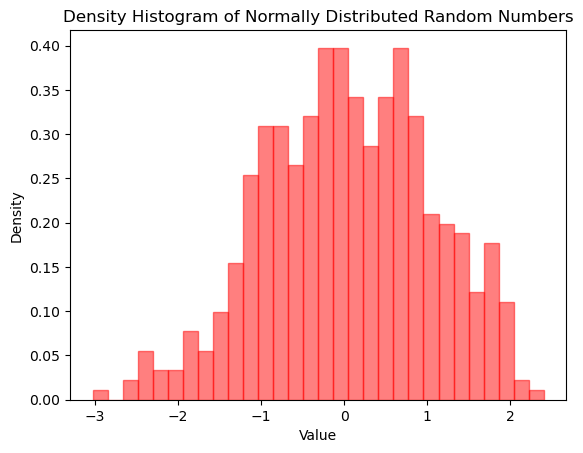

In [63]:
plt.hist(arrRandNorm, bins=30, density=True, alpha=0.5, color='red', edgecolor='red');
plt.title('Density Histogram of Normally Distributed Random Numbers')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

# Ebola Example:

What is $\lambda$

In [88]:
lam=12/20
print(lam)

# Expected time to next event

1/lam

0.6


1.6666666666666667

In [90]:
expon.ppf(0.612, scale=1/lam)

1.577916565598106

In [91]:
0.578*12

6.936

Let's start by looking a 500 exponentially distributed random numbers

In [84]:
from scipy.stats import expon
uList = np.random.rand(500)
xList=expon.ppf(uList, scale=1/lam); #distriution is specified in terms of scale=1/lambda
np.mean(xList)

0.6


1.5532840866048483

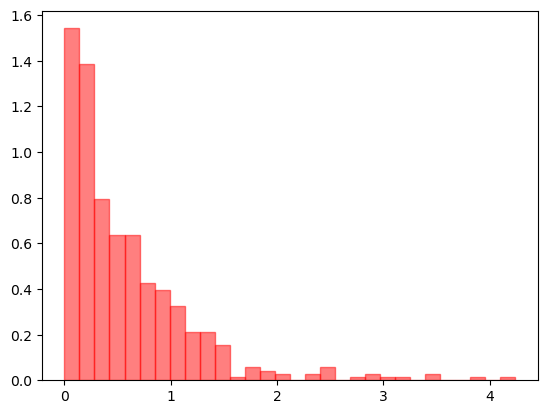

In [83]:
plt.hist(xList, bins=30, density=True, alpha=0.5, color='red', edgecolor='red');

Now lets focus on the next 5 events

In [92]:
# Uniform Random
uList = np.random.rand(5)
print(uList)
# Expoenital
xList=expon.ppf(uList, scale=1/lam);
print(xList)

[0.1780568  0.12860686 0.21292492 0.56231978 0.80322517]
[0.32680664 0.22943672 0.39905272 1.37711119 2.70949204]


To calcuate the accumualted time until the nth event we then want to find the cummulative sum of the values in this vector:

$$
y_i=\sum_{j=1}^{i}x_i
$$

In [95]:
cumList=np.cumsum(xList)
print(cumList)

[0.32680664 0.55624336 0.95529608 2.33240727 5.04189931]


To figure out what this corresponds to in months we want to decimal part of the number (calculated from the modulus) times 12.

In [99]:
(cumList%1)*12

array([ 3.92167963,  6.67492032, 11.46355297,  3.98888728,  0.50279175])